# Exploratory Data Analysis

This notebook contains exploratory data analysis of the mini project for CarValueML:AI-driven application using Gradio Interface.

## Importing required libraires and dataset

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)

import seaborn as sns




In [2]:
# Importing data
data = pd.read_csv('../data/cars_24_combined.csv')
data.head()

,Unnamed: 0,Car Name,Year,Distance,Owner,Fuel,Location,Drive,Type,Price
0,0,Maruti S PRESSO,2022.0,3878,1,PETROL,HR-98,Manual,HatchBack,514000
1,1,Hyundai Xcent,2018.0,32041,1,PETROL,TN-22,Manual,Sedan,674000
2,2,Tata Safari,2021.0,96339,1,DIESEL,TS-08,Automatic,SUV,1952000
3,3,Maruti Vitara Brezza,2019.0,51718,1,DIESEL,WB-24,Manual,SUV,690000
4,4,Tata Tiago,2021.0,19811,1,PETROL,HR-51,Manual,HatchBack,526000


In [3]:
# Get the inforamtion about the shape of the data
data.shape

(8015, 10)

In [4]:
print(f"Number of samples: {len(data)}")
print(f"Number of features: {len(data.columns)}")

Number of samples: 8015
Number of features: 10


In [5]:
# Get the columns of the dataset
print(f"Columns in the data: {list(data.columns)}")

Columns in the data: ['Unnamed: 0', 'Car Name', 'Year', 'Distance', 'Owner', 'Fuel', 'Location', 'Drive', 'Type', 'Price']


In [6]:
# Remove the Unnamed:0 colum
data.drop('Unnamed: 0', axis=1, inplace=True)

### Data Checks
* Check duplicate values
* Check missing values
* Check the unique values in the dataset
* Check the data types of the data
* Check the descriptive statistics of the dataset

#### Check for duplicate values in the dataset

In [7]:
data.duplicated().sum()

0

#### Check for missing values in the dataset

In [8]:
data.isnull().sum()

Car Name      1
Year          1
Distance      0
Owner         0
Fuel          0
Location    213
Drive         0
Type          0
Price         0
dtype: int64

Drop the missing values because there is no information regarding those missing values to fill them

In [9]:
data.dropna(inplace=True)

In [10]:
# Check for missing values again
data.isnull().sum()

Car Name    0
Year        0
Distance    0
Owner       0
Fuel        0
Location    0
Drive       0
Type        0
Price       0
dtype: int64

#### Check for unique values in the dataset

In [11]:
data.nunique()

Car Name     125
Year          14
Distance    7504
Owner          4
Fuel           4
Location     436
Drive          2
Type           5
Price       1353
dtype: int64

#### Check for datatypes in the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7801 entries, 0 to 8014
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car Name  7801 non-null   object 
 1   Year      7801 non-null   float64
 2   Distance  7801 non-null   int64  
 3   Owner     7801 non-null   int64  
 4   Fuel      7801 non-null   object 
 5   Location  7801 non-null   object 
 6   Drive     7801 non-null   object 
 7   Type      7801 non-null   object 
 8   Price     7801 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 609.5+ KB


In [13]:
data["Year"] = data["Year"].astype(int)

#### Check for descriptive statistics of the data

In [14]:
data.describe()

,Year,Distance,Owner,Price
count,7801.000000,7801.000000,7801.000000,7.801000e+03
mean,2017.043584,50936.111524,1.298936,5.787559e+05
std,2.847698,25866.884915,0.510013,2.661326e+05
min,2010.000000,0.000000,1.000000,1.190000e+05
25%,2015.000000,30198.000000,1.000000,3.960000e+05
50%,2017.000000,49245.000000,1.000000,5.380000e+05
75%,2019.000000,69981.000000,2.000000,7.020000e+05
max,2023.000000,153870.000000,4.000000,3.300000e+06


**Insights:**
- The dataset contains 7800 samples
- The dataset contains samples from 2010 to 2023.
- The average distance travelled by each car is 50,900 kms.
- The average price of used car is 5.7 lakh.

### Feature Engineering

In [15]:
# Split the location column
location_series = data["Location"].values
state_series = [i.split("-")[0] for i in location_series]

# Adding the columns 
data["State"] = state_series

# Dropping the location column
data.drop("Location", axis=1, inplace=True)

In [16]:
# Split the brand name and model name
car_name = data['Car Name'].values

brand_name = [i.split()[0] for i in car_name]
model_name = [i.split()[1] for i in car_name]
data["Brand"] = brand_name
data["Model Name"] = model_name

data.drop('Car Name', axis=1, inplace=True)

For reducing computational complexity, let's convert the price column to price(k)

In [17]:
data["Price(k)"] = data["Price"]//1000
data.drop("Price", axis=1, inplace=True)


### Data Exploration

In [18]:
# find the categorical and numerical columns
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

num_cols, cat_cols

(Index(['Year', 'Distance', 'Owner', 'Price(k)'], dtype='object'),
 Index(['Fuel', 'Drive', 'Type', 'State', 'Brand', 'Model Name'], dtype='object'))

Exploring categorical columns

In [19]:
cat_cols

Index(['Fuel', 'Drive', 'Type', 'State', 'Brand', 'Model Name'], dtype='object')

In [20]:
for i in cat_cols:
    print(f"Unique Categories in {i} feature:  {len(data[i].unique())}")

Unique Categories in Fuel feature:  4
Unique Categories in Drive feature:  2
Unique Categories in Type feature:  5
Unique Categories in State feature:  17
Unique Categories in Brand feature:  16
Unique Categories in Model Name feature:  107


Printing all the unique values

In [21]:
for i in cat_cols:
    print(f"Categories in {i} column: \n {data[i].unique()}\n")

Categories in Fuel column: 
 ['PETROL' 'DIESEL' 'CNG' 'LPG']

Categories in Drive column: 
 ['Manual' 'Automatic']

Categories in Type column: 
 ['HatchBack' 'Sedan' 'SUV' 'Lux_SUV' 'Lux_sedan']

Categories in State column: 
 ['HR' 'TN' 'TS' 'WB' 'MH' 'UP' 'KA' 'PB' 'GJ' 'DL' 'CH' 'KL' 'RJ' 'BR'
 'AP' 'MP' '22']

Categories in Brand column: 
 ['Maruti' 'Hyundai' 'Tata' 'Renault' 'Honda' 'Ford' 'Datsun' 'Toyota'
 'Mahindra' 'Nissan' 'KIA' 'Volkswagen' 'Skoda' 'BMW' 'Jeep' 'MG']

Categories in Model Name column: 
 ['S' 'Xcent' 'Safari' 'Vitara' 'Tiago' 'Swift' 'Kwid' 'Grand' 'IGNIS'
 'Brio' 'Elite' 'Baleno' 'WR-V' 'Amaze' 'Alto' 'Celerio' 'Ecosport' 'Ciaz'
 'City' 'Redi' 'TIAGO' 'Santro' 'FREESTYLE' 'Dzire' 'NEW' 'Endeavour'
 'Wagon' 'GRAND' 'URBAN' 'XUV500' 'Verna' 'VENUE' 'NEXON' 'KUV' 'YARIS'
 'XUV' 'TRIBER' 'Tucson' 'TUV300' 'Glanza' 'Eeco' 'Duster' 'i10' 'MAGNITE'
 'SONET' 'Ertiga' 'Jazz' 'SELTOS' 'Ameo' 'Kiger' 'ALTROZ' 'A' 'Ritz'
 'Micra' 'i20' 'Eon' 'Creta' 'Bolero' 'Etios' 'New'

In [22]:
# remove the samples where the state column contains 22 value
data = data[data['State'] != '22']

## Data Visualization

This section describes the dataset in a way that everyone understands the patterns in the dataset using charts and graphs.

### Univariate Analysis

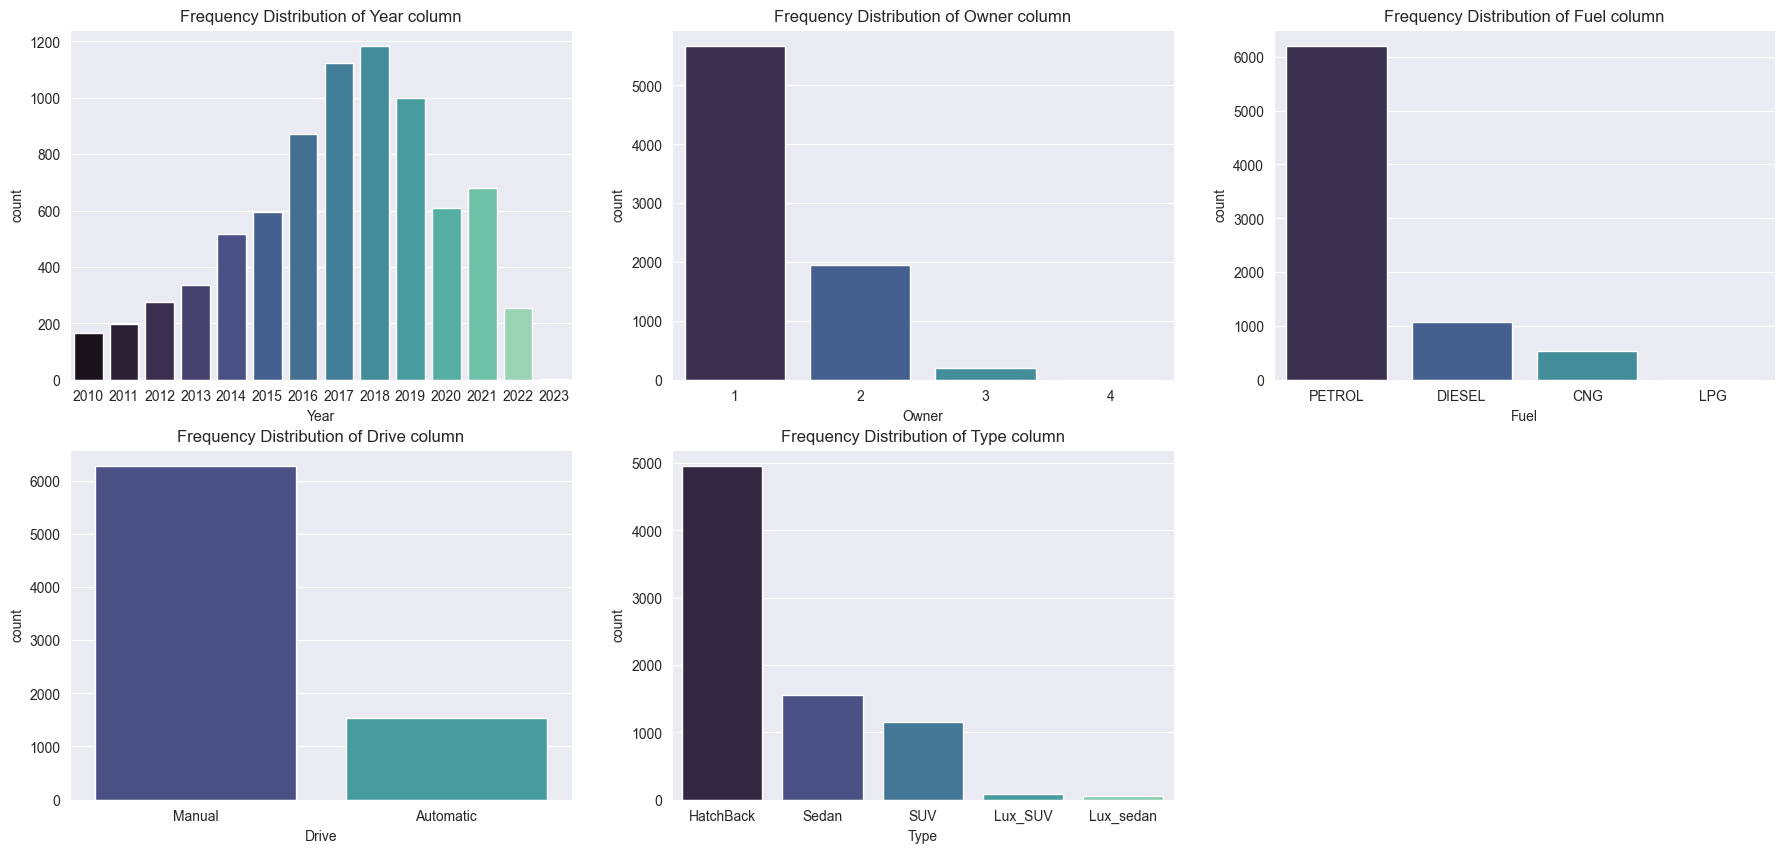

In [23]:
cols = ["Year", "Owner", "Fuel", "Drive", "Type"]
plt.figure(figsize=(22, 10))
for i in range(len(cols)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=data, x = cols[i], palette='mako')
    plt.title(f"Frequency Distribution of {cols[i]} column")
plt.savefig("../plots/univariate_analysis.png")
plt.show()

### Bivariate Analysis

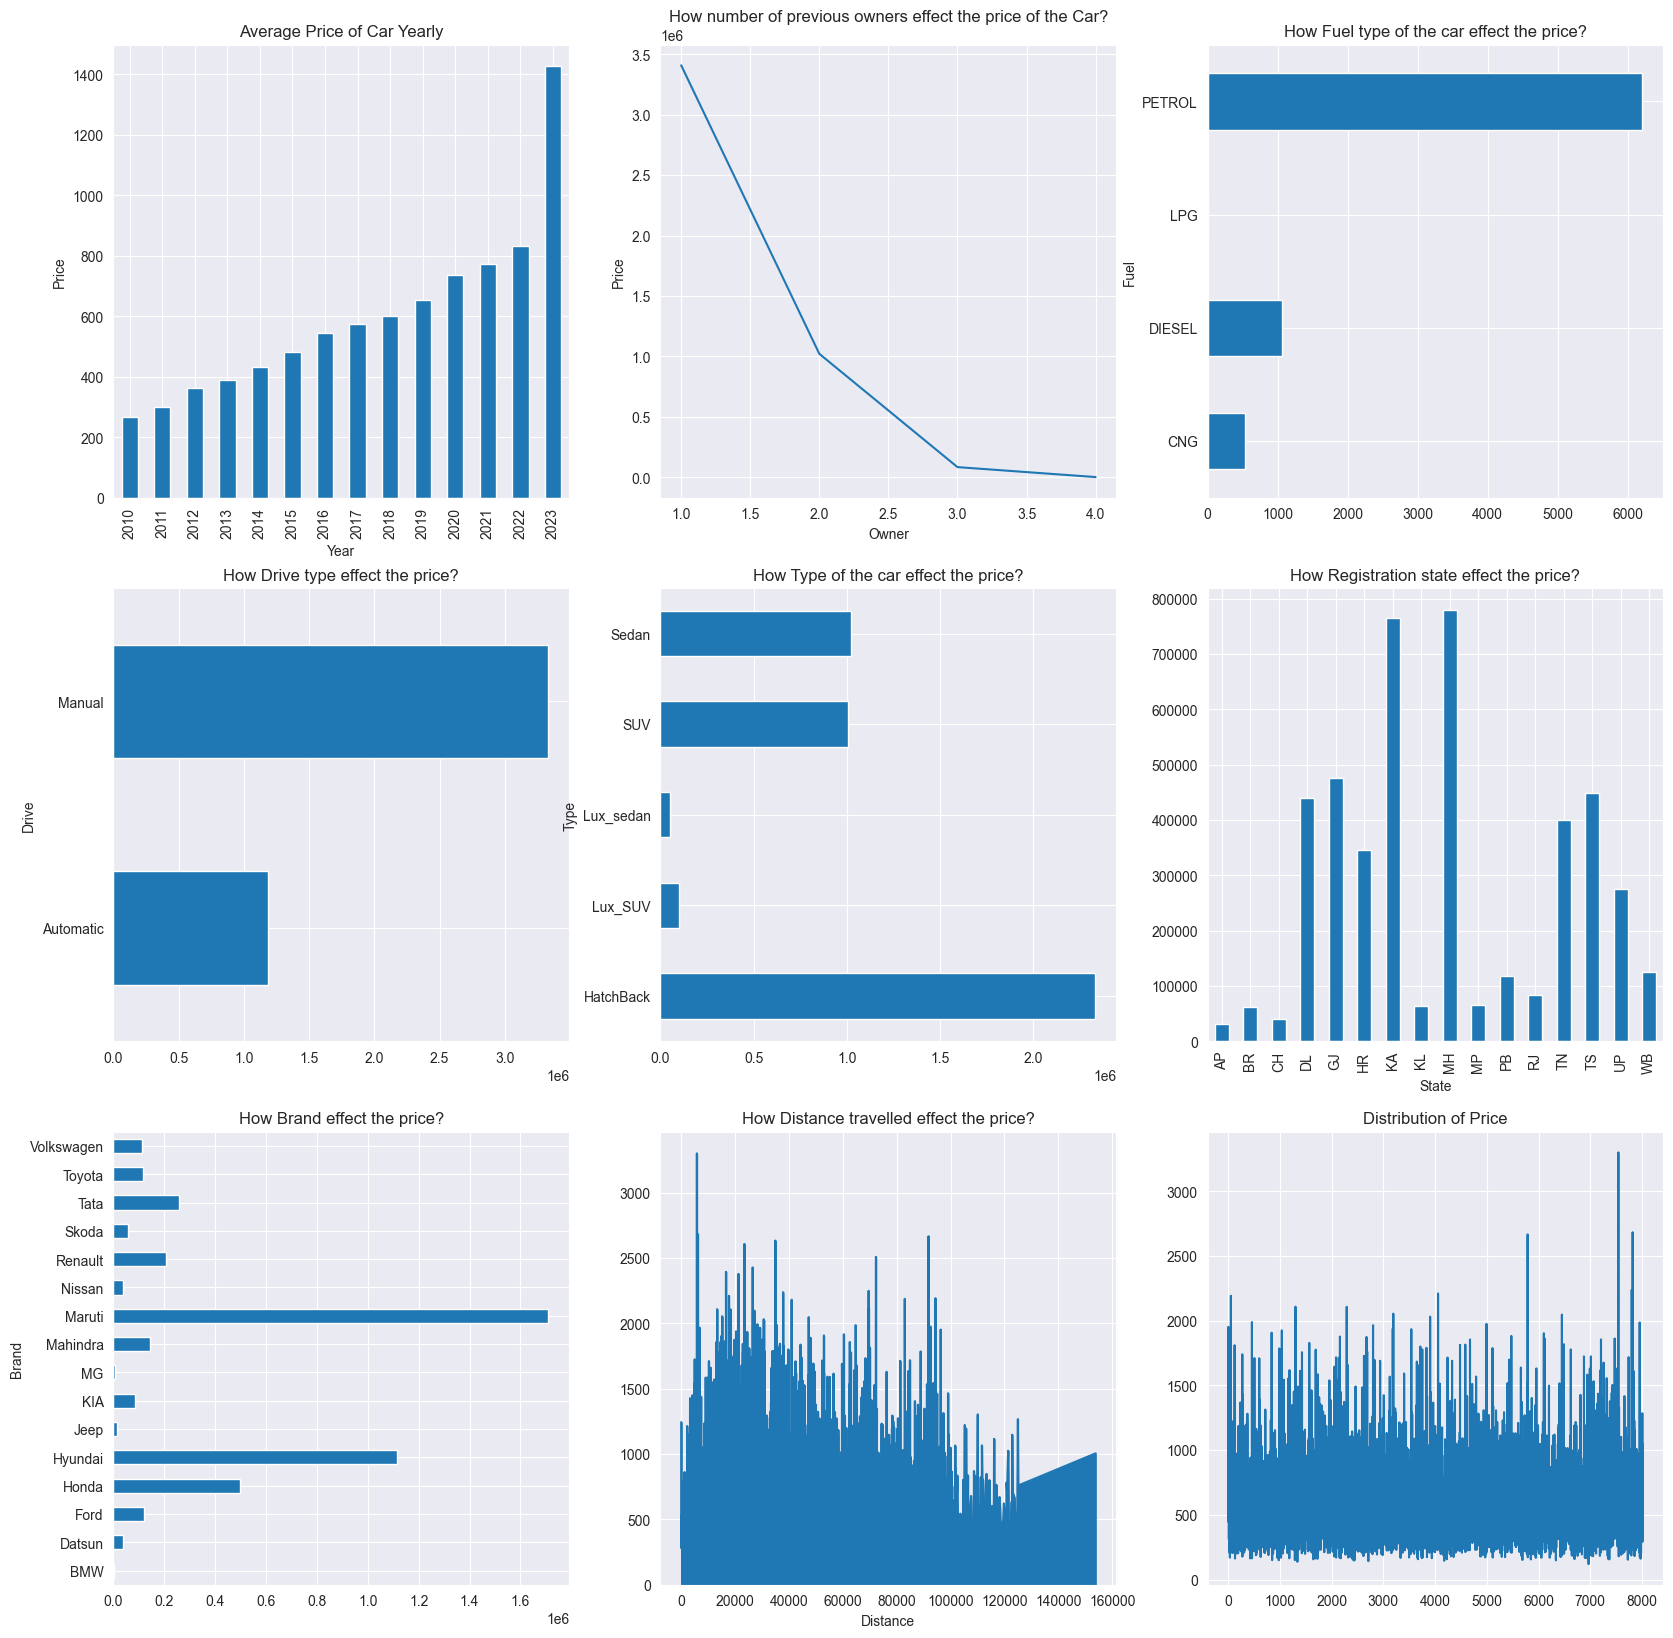

In [24]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
year_grouped_data = data[num_cols].groupby("Year").mean()["Price(k)"]
year_grouped_data.plot(kind="bar")
plt.title("Average Price of Car Yearly")
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(3, 3, 2)
owner_grouped_data = data[num_cols].groupby("Owner").sum()["Price(k)"]
owner_grouped_data.plot(kind="line")
plt.title("How number of previous owners effect the price of the Car?")
plt.xlabel("Owner")
plt.ylabel("Price")

plt.subplot(3, 3, 3)
fuel_grouped_data = data.groupby("Fuel").count()["Price(k)"]
fuel_grouped_data.plot(kind="barh")
plt.title("How Fuel type of the car effect the price?")

plt.subplot(3, 3, 4)
drive_grouped_data = data.groupby("Drive").sum()["Price(k)"]
drive_grouped_data.plot(kind="barh")
plt.title("How Drive type effect the price?")


plt.subplot(3, 3, 5)
car_type_grouped = data.groupby("Type").sum()["Price(k)"]
car_type_grouped.plot(kind="barh")
plt.title("How Type of the car effect the price?")

plt.subplot(3, 3, 6)
state_grouped = data.groupby("State").sum()["Price(k)"]
state_grouped.plot(kind="bar")
plt.title("How Registration state effect the price?")

plt.subplot(3, 3, 7)
brand_grouped_data = data.groupby("Brand").sum()["Price(k)"]
brand_grouped_data.plot(kind="barh")
plt.title("How Brand effect the price?")

plt.subplot(3, 3, 8)
distance_grouped_data = data.groupby("Distance").sum()["Price(k)"]
distance_grouped_data.plot(kind="area")
plt.title("How Distance travelled effect the price?")

plt.subplot(3, 3, 9)
plt.plot(data["Price(k)"])
plt.title("Distribution of Price")

plt.savefig("../plots/bivariate_analysis.png")
plt.show()

In [25]:
data.head(5)

,Year,Distance,Owner,Fuel,Drive,Type,State,Brand,Model Name,Price(k)
0,2022,3878,1,PETROL,Manual,HatchBack,HR,Maruti,S,514
1,2018,32041,1,PETROL,Manual,Sedan,TN,Hyundai,Xcent,674
2,2021,96339,1,DIESEL,Automatic,SUV,TS,Tata,Safari,1952
3,2019,51718,1,DIESEL,Manual,SUV,WB,Maruti,Vitara,690
4,2021,19811,1,PETROL,Manual,HatchBack,HR,Tata,Tiago,526


## Correlation matrix

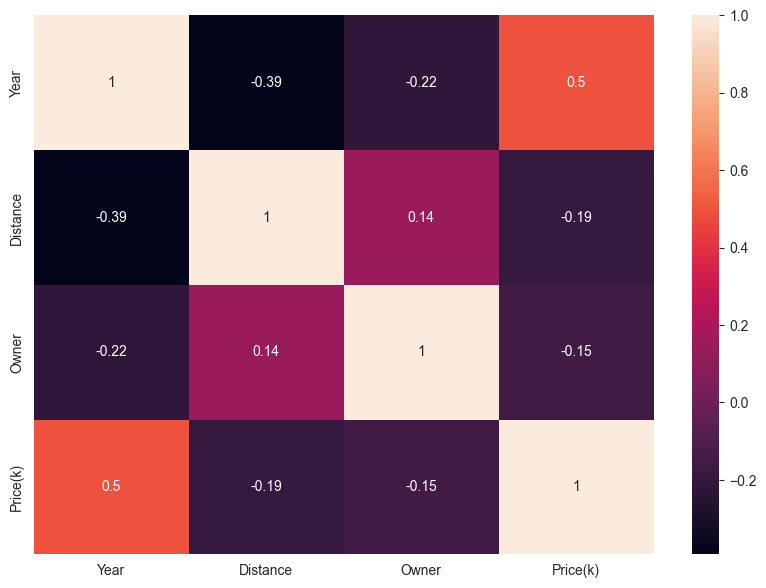

In [26]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

In [27]:
# Saving the preprocessed data to the directory
data.to_csv("../data/data_preprocessed.csv", index=False, header=True)